In [2]:
# Загрузка Pandas и очистка данных

In [39]:
import pandas as pd

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Number of Reviews  37457 non-null  float64
 6   Reviews            40000 non-null  object 
 7   URL_TA             40000 non-null  object 
 8   ID_TA              40000 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.7+ MB


Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

Index(['id', 'city', 'cuisine', 'ranking', 'rating', 'reviews_col', 'reviews',
       'url_ta', 'id_ta'],
      dtype='object')

count    40000.000000
mean         3.993037
std          0.668417
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

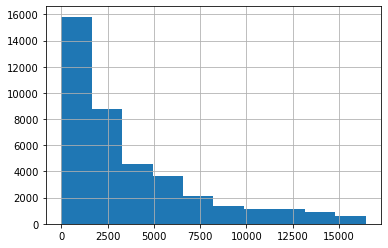

In [40]:
df = pd.read_csv('main_task_new.csv')

#смотрим список столбцов датафрейма
display(df.columns)
#display(df)
#удаляем не нужные нам столбцы из набора данных
#df.drop(['City', 'Cuisine Style', 'Ranking',
#       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'], axis=1, inplace = True)
df.isna().value_counts()
df['Price Range'].value_counts()
#df['Rating'].mean()
df.drop(['Price Range'], axis=1, inplace = True)
df.info()

#RDA
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

display(df.columns)
df = df.rename(columns={'Restaurant_id': 'id', 'City': 'city', 'Cuisine Style': 'cuisine', 'Ranking': 'ranking', 'Rating': 'rating', 'Number of Reviews': 'reviews_col', 'Reviews': 'reviews', 'URL_TA': 'url_ta', 'ID_TA': 'id_ta'})
display(df.columns)

df.ranking.hist()
df.ranking.describe()

df.rating.hist()
df.rating.describe()


In [41]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки
#

In [42]:
df

,id,city,cuisine,ranking,rating,reviews_col,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [48]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['id', 'rating'], axis = 1)
y = df['rating']


In [49]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [50]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [51]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [52]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

ValueError: could not convert string to float: 'Lisbon'

In [9]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

NameError: name 'y_pred' is not defined